In [1]:
# Imports
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Importing and Setuping Up Dataset

In [2]:
df = pd.read_csv('all_games.csv', low_memory=False)
df.head()

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination,Turns
0,0,Rated Classical game,0-1,1627,1827,B01,Scandinavian Defense,Normal,62
1,1,Rated Correspondence game,1/2-1/2,1337,1662,A00,Van't Kruijs Opening,Normal,164
2,2,Rated Classical game,1-0,1402,1524,B02,Alekhine Defense: Maroczy Variation,Normal,35
3,3,Rated Blitz game,1-0,1753,1744,C42,Russian Game: Three Knights Game,Normal,69
4,4,Rated Bullet game,1-0,1651,1627,A40,English Defense #2,Normal,61


In [3]:
# Remove uncalibrated games
df = df[df['White Rating'] != '?']
df = df[df['Black Rating'] != '?']

In [4]:
df = df.astype({
    'White Rating': int,
    'Black Rating': int,
})

In [5]:
df['Rating Diff'] = abs(df['White Rating'] - df['Black Rating'])
df['Avg Rating'] = (df['White Rating'] + df['Black Rating']) / 2

# Rating Analysis

In [71]:
Rating_Ranges = [1200, 1400, 1600, 1800, 2000, 2200]

(690.999, 1200.0]    1084914
(1200.0, 1400.0]     2672106
(1400.0, 1600.0]     4764915
(1600.0, 1800.0]     5437270
(1800.0, 2000.0]     3881250
(2000.0, 2200.0]     1619927
(2200.0, 3053.0]      539618
dtype: int64

<AxesSubplot:>

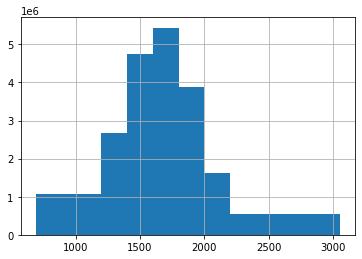

In [72]:
rating = df['White Rating'].append(df['Black Rating'], ignore_index=True)
bins = [rating.min()] + Rating_Ranges + [rating.max()]
display(rating.value_counts(bins=bins, sort=False))
rating.hist(bins=bins)

(-1.878, 93.85]      5587519
(93.85, 187.7]       2335715
(187.7, 281.55]      1111041
(281.55, 375.4]       483623
(375.4, 469.25]       232396
(469.25, 563.1]       124443
(563.1, 656.95]        64076
(656.95, 750.8]        32335
(750.8, 844.65]        15476
(844.65, 938.5]         7204
(938.5, 1032.35]        3547
(1032.35, 1126.2]       1507
(1126.2, 1220.05]        650
(1220.05, 1313.9]        293
(1313.9, 1407.75]        102
(1407.75, 1501.6]         46
(1501.6, 1595.45]         18
(1595.45, 1689.3]          6
(1689.3, 1783.15]          2
(1783.15, 1877.0]          1
Name: Rating Diff, dtype: int64

<AxesSubplot:>

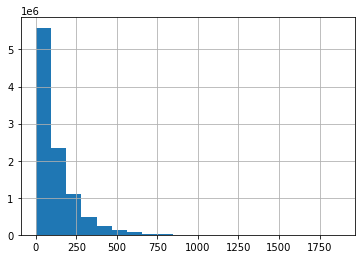

In [20]:
display(df['Rating Diff'].value_counts(bins=20, sort=False))
df['Rating Diff'].hist(bins=20)

(769.499, 1200.0]     469317
(1200.0, 1400.0]     1296150
(1400.0, 1600.0]     2432965
(1600.0, 1800.0]     2853567
(1800.0, 2000.0]     1980709
(2000.0, 2200.0]      756673
(2200.0, 2944.0]      210619
Name: Avg Rating, dtype: int64

<AxesSubplot:>

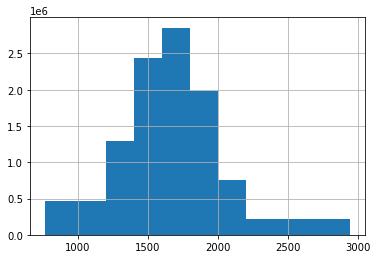

In [73]:
avg_bins = [df['Avg Rating'].min()] + Rating_Ranges + [df['Avg Rating'].max()]
display(df['Avg Rating'].value_counts(bins=avg_bins, sort=False))
df['Avg Rating'].hist(bins=avg_bins)

In [49]:
display(df['Avg Rating'].value_counts(bins=3, sort=False))

(767.325, 1494.333]     2784249
(1494.333, 2219.167]    7036787
(2219.167, 2944.0]       178964
Name: Avg Rating, dtype: int64

In [22]:
df['Event'].value_counts()

Rated Blitz game               3870582
Rated Classical game           2433807
Rated Bullet game              1970704
Rated Blitz tournament          751459
Rated Bullet tournament         662813
Rated Classical tournament      266397
Rated Correspondence game        44238
Name: Event, dtype: int64

In [23]:
df['Event'].unique()

array(['Rated Classical game', 'Rated Correspondence game',
       'Rated Blitz game', 'Rated Bullet game',
       'Rated Classical tournament ', 'Rated Blitz tournament ',
       'Rated Bullet tournament '], dtype=object)

# Opening Analysis

In [6]:
def opening_prune(op):
    split = re.split('[:#,]', op)
    return split[0].rstrip()
df['Opening Short'] = df['Opening'].apply(opening_prune)

In [7]:
df['Opening Short'].value_counts(normalize=True)
counts = df['Opening Short'].value_counts()
percentage = df['Opening Short'].value_counts(normalize=True).mul(100)
open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
print('Overall Most Popular Openings')
open_stats.head(10)

Overall Most Popular Openings


,counts,percentage
Sicilian Defense,1122640,11.22640
French Defense,682542,6.82542
Queen's Pawn Game,605547,6.05547
Scandinavian Defense,462854,4.62854
King's Pawn Game,418280,4.18280
Italian Game,344832,3.44832
Caro-Kann Defense,331632,3.31632
Philidor Defense,328675,3.28675
English Opening,315162,3.15162
Ruy Lopez,267531,2.67531


In [26]:
df_q = df[df['Opening Short'] == "Queen's Pawn Game"]
df_q['Opening'].value_counts()

Queen's Pawn Game #2                                                        103556
Queen's Pawn Game: Chigorin Variation                                        94690
Queen's Pawn Game: Mason Attack                                              76423
Queen's Pawn Game: Zukertort Variation                                       71070
Queen's Pawn Game                                                            64255
Queen's Pawn Game #3                                                         26812
Queen's Pawn Game: London System                                             22409
Queen's Pawn Game: Levitsky Attack                                           19546
Queen's Pawn Game: Symmetrical Variation                                     16090
Queen's Pawn Game: Colle System                                              15814
Queen's Pawn Game: Franco-Sicilian Defense                                   14677
Queen's Pawn Game: Anti-Torre                                                11789
Quee

In [27]:
df_k = df[df['Opening Short'] == "King's Pawn Game"]
df_k['Opening'].value_counts()

King's Pawn Game: Wayward Queen Attack                                82487
King's Pawn Game: Leonardis Variation                                 77342
King's Pawn Game: McConnell Defense                                   37812
King's Pawn Game: Busch-Gass Gambit                                   35324
King's Pawn Game: Napoleon Attack                                     29878
King's Pawn Game                                                      27532
King's Pawn Game: Damiano Defense                                     26487
King's Pawn Game: Maroczy Defense                                     18247
King's Pawn Game: Wayward Queen Attack, Kiddie Countergambit          17595
King's Pawn Game: Macleod Attack                                      15805
King's Pawn Game: King's Head Opening #2                              10463
King's Pawn Game: Nimzowitsch Defense                                  8014
King's Pawn Game: Beyer Gambit                                         5615
King's Pawn 

In [56]:
for event in df['Event'].unique():
    df_event = df[df['Event'] == event]
    print(f'Popular Openings in {event}')
    counts = df_event['Opening Short'].value_counts()
    percentage = df_event['Opening Short'].value_counts(normalize=True).mul(100)
    open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
    display(open_stats.head(10))

Popular Openings in Rated Blitz game


,counts,percentage
Sicilian Defense,58195,13.153880
French Defense,34123,7.712859
Queen's Pawn Game,28139,6.360289
Scandinavian Defense,16098,3.638649
Caro-Kann Defense,15487,3.500544
Philidor Defense,15433,3.488338
English Opening,14779,3.340514
King's Pawn Game,13067,2.953548
Italian Game,11018,2.490411
Ruy Lopez,10401,2.350949


Popular Openings in Rated Classical game


,counts,percentage
Sicilian Defense,31432,11.122198
Queen's Pawn Game,19957,7.061775
French Defense,19416,6.870342
King's Pawn Game,16411,5.807025
Philidor Defense,14366,5.083402
Italian Game,10458,3.700558
Scandinavian Defense,10407,3.682512
Bishop's Opening,9078,3.212246
Ruy Lopez,8341,2.951459
English Opening,8022,2.838581


Popular Openings in Rated Blitz tournament 


,counts,percentage
Sicilian Defense,8806,14.977464
Queen's Pawn Game,3708,6.306659
French Defense,3362,5.718173
English Opening,2149,3.655073
Caro-Kann Defense,2051,3.488392
Scandinavian Defense,1880,3.197551
Italian Game,1733,2.947530
Ruy Lopez,1581,2.689004
Philidor Defense,1454,2.472999
Queen's Gambit Declined,1434,2.438983


Popular Openings in Rated Bullet game


,counts,percentage
Sicilian Defense,21228,7.898320
French Defense,18565,6.907496
Queen's Pawn Game,13351,4.967518
Hungarian Opening,12679,4.717487
Modern Defense,12470,4.639724
Nimzo-Larsen Attack,12359,4.598424
Scandinavian Defense,11536,4.292210
Zukertort Opening,10247,3.812610
Caro-Kann Defense,9993,3.718104
Van't Kruijs Opening,9630,3.583042


Popular Openings in Rated Bullet tournament 


,counts,percentage
Sicilian Defense,3956,7.438467
French Defense,3877,7.289923
Caro-Kann Defense,2962,5.569449
Hungarian Opening,2735,5.142621
Queen's Pawn Game,2617,4.920745
Zukertort Opening,2611,4.909464
Nimzo-Larsen Attack,2241,4.213753
Scandinavian Defense,2136,4.016321
Modern Defense,1967,3.698550
Van't Kruijs Opening,1831,3.442829


Popular Openings in Rated Correspondence game


,counts,percentage
King's Pawn Game,177,7.108434
Queen's Pawn Game,164,6.586345
Sicilian Defense,157,6.305221
English Opening,123,4.939759
Van't Kruijs Opening,118,4.738956
French Defense,116,4.658635
Kadas Opening,89,3.574297
Scandinavian Defense,81,3.253012
Bishop's Opening,74,2.971888
Zukertort Opening,68,2.730924


Popular Openings in Rated Classical tournament 


,counts,percentage
Sicilian Defense,366,11.738294
English Opening,201,6.446440
Queen's Pawn Game,194,6.221937
French Defense,164,5.259782
Caro-Kann Defense,138,4.425914
Philidor Defense,133,4.265555
Italian Game,100,3.207184
Ruy Lopez,95,3.046825
Bird Opening,84,2.694035
Bishop's Opening,83,2.661963


# Rating Breakdown

In [8]:
Rating_Ranges = [1500, 2200, 2200]

In [26]:
df_novice = df[df['Avg Rating'] < 1500]
df_n = pd.DataFrame(df_novice['Opening Short'].value_counts(normalize=True)).reset_index()
df_n[df_n['index'] == 'Scandinavian Defense']
#df_n.loc('Scandinavian Defense')

,index,Opening Short
4,Scandinavian Defense,0.056198


In [27]:
df_master = df[df['Avg Rating'] > 2200]
df_m = pd.DataFrame(df_master['Opening Short'].value_counts(normalize=True)).reset_index()
df_m[df_m['index'] == 'Scandinavian Defense']

,index,Opening Short
10,Scandinavian Defense,0.028563


In [11]:
df_mid = df[(df['Avg Rating'] > 1500) & (df['Avg Rating'] < 2200)]

In [59]:
Rating_Ranges = [1200, 1400, 1600, 1800, 2000, 2200, 2500, 2500]
for i in range(len(Rating_Ranges)):
    if(i == 0):
        df_rate = df[(df['White Rating'] < Rating_Ranges[i]) & (df['Black Rating'] < Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: 0 - {Rating_Ranges[i]}')
    elif(i == len(Rating_Ranges) - 1):
        df_rate = df[(df['White Rating'] > Rating_Ranges[i]) & (df['Black Rating'] > Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: >{Rating_Ranges[i]}')
    else:
        df_rate = df[(df['White Rating'] > Rating_Ranges[i-1]) & (df['Black Rating'] > Rating_Ranges[i-1]) &
                    (df['White Rating'] < Rating_Ranges[i]) & (df['Black Rating'] < Rating_Ranges[i])]
        print(f'Popular Openings in Rating Range: {Rating_Ranges[i-1]} - {Rating_Ranges[i]}')      
    counts = df_rate['Opening Short'].value_counts()
    percentage = df_rate['Opening Short'].value_counts(normalize=True).mul(100)
    open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
    open_stats.index.name='Opening'
    open_stats = open_stats.reset_index()
    display(open_stats.head(10))    
   # display(open_stats[open_stats['Opening'] == "King's Pawn Game"])

Popular Openings in Rating Range: 0 - 1200


,Opening,counts,percentage
0,King's Pawn Game,45191,14.703576
1,Queen's Pawn Game,23538,7.658445
2,Scandinavian Defense,18060,5.876094
3,French Defense,15567,5.064959
4,Sicilian Defense,13041,4.243087
5,Van't Kruijs Opening,12323,4.009475
6,Philidor Defense,10797,3.512967
7,Bishop's Opening,8405,2.734694
8,Russian Game,7358,2.394037
9,Italian Game,7275,2.367031


Popular Openings in Rating Range: 1200 - 1400


,Opening,counts,percentage
0,King's Pawn Game,69334,9.852974
1,Queen's Pawn Game,52334,7.437124
2,Sicilian Defense,50626,7.194402
3,Scandinavian Defense,42120,5.985624
4,French Defense,40233,5.717465
5,Philidor Defense,33905,4.818200
6,Italian Game,31721,4.507834
7,Ruy Lopez,24062,3.419423
8,Bishop's Opening,19872,2.823987
9,Van't Kruijs Opening,18712,2.659141


Popular Openings in Rating Range: 1400 - 1600


,Opening,counts,percentage
0,Sicilian Defense,133531,9.949808
1,Queen's Pawn Game,90741,6.761393
2,French Defense,88641,6.604915
3,King's Pawn Game,72787,5.423585
4,Philidor Defense,66235,4.935375
5,Scandinavian Defense,65549,4.884259
6,Italian Game,64550,4.809820
7,Ruy Lopez,47826,3.563663
8,Bishop's Opening,36865,2.746925
9,English Opening,34242,2.551477


Popular Openings in Rating Range: 1600 - 1800


,Opening,counts,percentage
0,Sicilian Defense,194236,12.807510
1,French Defense,108414,7.148589
2,Queen's Pawn Game,92593,6.105386
3,Scandinavian Defense,69136,4.558681
4,Italian Game,56796,3.745008
5,Caro-Kann Defense,53442,3.523852
6,Philidor Defense,53324,3.516071
7,English Opening,44441,2.930345
8,Ruy Lopez,41977,2.767874
9,Modern Defense,37802,2.492584


Popular Openings in Rating Range: 1800 - 2000


,Opening,counts,percentage
0,Sicilian Defense,144017,14.306874
1,French Defense,77911,7.739801
2,Queen's Pawn Game,51826,5.148476
3,Caro-Kann Defense,46380,4.607462
4,English Opening,42326,4.204731
5,Scandinavian Defense,39928,3.966510
6,Italian Game,24554,2.439233
7,Modern Defense,24493,2.433173
8,Queen's Gambit Declined,23996,2.383800
9,Indian Game,23163,2.301049


Popular Openings in Rating Range: 2000 - 2200


,Opening,counts,percentage
0,Sicilian Defense,51409,14.382353
1,French Defense,27318,7.642574
2,Caro-Kann Defense,18860,5.276336
3,English Opening,16758,4.688274
4,Queen's Pawn Game,14976,4.189735
5,Scandinavian Defense,12219,3.418428
6,Zukertort Opening,10835,3.031236
7,Modern Defense,9938,2.780288
8,Indian Game,9715,2.717901
9,King's Indian Defense,8731,2.442614


Popular Openings in Rating Range: 2200 - 2500


,Opening,counts,percentage
0,Sicilian Defense,14149,13.595004
1,French Defense,6567,6.309873
2,English Opening,5990,5.755465
3,Caro-Kann Defense,5527,5.310593
4,Zukertort Opening,4709,4.524622
5,Queen's Pawn Game,4099,3.938506
6,Indian Game,3199,3.073745
7,King's Indian Defense,3138,3.015133
8,Modern Defense,2943,2.827768
9,Scandinavian Defense,2778,2.669229


Popular Openings in Rating Range: >2500


,Opening,counts,percentage
0,Sicilian Defense,575,12.400259
1,Nimzo-Larsen Attack,249,5.369851
2,English Opening,242,5.218892
3,French Defense,211,4.550356
4,King's Indian Defense,188,4.054345
5,Zukertort Opening,171,3.687729
6,King's Indian Attack,164,3.536769
7,Queen's Gambit Declined,151,3.256416
8,Caro-Kann Defense,140,3.019193
9,Indian Game,135,2.911365


# Effectiveness of Top Openings in Top Level Play

In [61]:
df_top = df[(df['Avg Rating'] > 2500)]
counts = df_top['Opening Short'].value_counts()
percentage = df_top['Opening Short'].value_counts(normalize=True).mul(100)
top_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
display(top_stats.head(5))

,counts,percentage
Sicilian Defense,1061,10.417280
Nimzo-Larsen Attack,790,7.756505
English Opening,448,4.398625
French Defense,443,4.349534
Zukertort Opening,410,4.025528


In [64]:
openings = ['Sicilian Defense', 'French Defense', 'English Opening', 'Nimzo-Larsen Attack', 'Zukertort Opening']
for op in openings:
    df_op = df_top[df_top['Opening Short'] == op]
    df_results = pd.DataFrame(df_op['Result'].value_counts(normalize=True))
    print(f'>2500 ELO: Results for {op}')
    display(df_results)

>2500 ELO: Results for Sicilian Defense


,Result
0-1,0.479736
1-0,0.444863
1/2-1/2,0.075401


>2500 ELO: Results for French Defense


,Result
1-0,0.501129
0-1,0.437923
1/2-1/2,0.060948


>2500 ELO: Results for English Opening


,Result
0-1,0.497768
1-0,0.417411
1/2-1/2,0.084821


>2500 ELO: Results for Nimzo-Larsen Attack


,Result
1-0,0.700000
0-1,0.250633
1/2-1/2,0.049367


>2500 ELO: Results for Zukertort Opening


,Result
1-0,0.490244
0-1,0.446341
1/2-1/2,0.063415


In [65]:
ratings.min()

NameError: name 'ratings' is not defined

In [28]:
prev_i = 750
data = []
for i in range(800, 2900, 50):
    df_op = df[(df['Opening Short'] == 'Sicilian Defense') & (df['Avg Rating'] > prev_i) & (df['Avg Rating'] < i)]
    if df_op.empty:
        prev_i = i
        continue
    df_results = pd.DataFrame(df_op['Result'].value_counts(normalize=True))
    try:
        data.append({'Rating': i, 'White': df_results.loc['1-0']['Result'], 'Black': df_results.loc['0-1']['Result'], 'Draw': df_results.loc['1/2-1/2']['Result']})
    except KeyError:
        continue
    prev_i = i
df_sicilian = pd.DataFrame(data)

In [29]:
df_sicilian = df_sicilian.set_index('Rating')

In [31]:
df_sicilian['Black/Draw'] = df_sicilian['Black'] + df_sicilian['Draw']

<AxesSubplot:xlabel='Rating'>

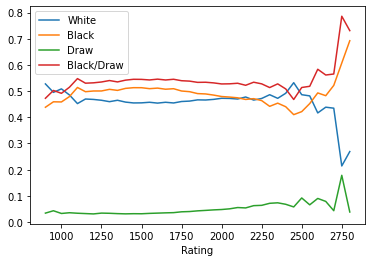

In [32]:
df_sicilian.plot.line()

<AxesSubplot:xlabel='Rating'>

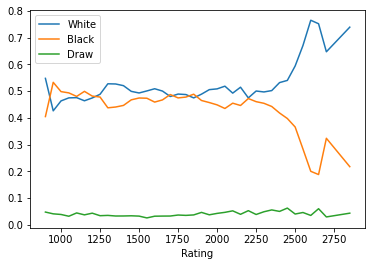

In [116]:
prev_i = 750
data = []
for i in range(800, 2900, 50):
    df_op = df[(df['Opening Short'] == 'Nimzo-Larsen Attack') & (df['Avg Rating'] > prev_i) & (df['Avg Rating'] < i)]
    if df_op.empty:
        prev_i = i
        continue
    df_results = pd.DataFrame(df_op['Result'].value_counts(normalize=True))
    try:
        data.append({'Rating': i, 'White': df_results.loc['1-0']['Result'], 'Black': df_results.loc['0-1']['Result'], 'Draw': df_results.loc['1/2-1/2']['Result']})
    except KeyError:
        continue
    prev_i = i
df_lar = pd.DataFrame(data)
df_lar = df_lar.set_index('Rating')
df_lar.plot.line()

Text(0.5, 0.98, 'Nimzo-Larsen Attack: Rating vs Results')

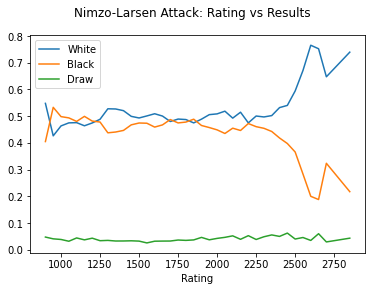

In [127]:
df_lar.plot.line()
plt.suptitle("Nimzo-Larsen Attack: Rating vs Results")

Text(0.5, 0.98, 'Sicilian Defense: Rating vs Results')

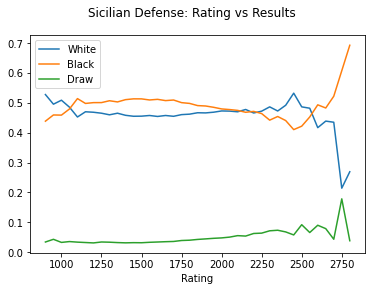

In [118]:
df_sicilian.plot.line()
plt.suptitle("Sicilian Defense: Rating vs Results")

In [119]:
df_sicilian['Black vs White'] = df_sicilian['Black'] - df_sicilian['White']

Text(0.5, 0.98, 'Sicilian Defense: Rating vs Results')

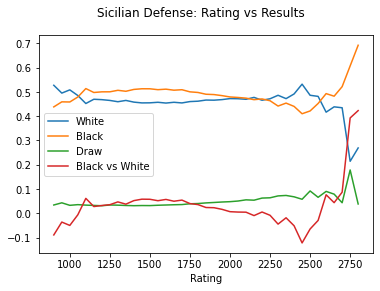

In [126]:
df['Opening Short'].value_counts(normalize=True)
counts = df['Opening Short'].value_counts()
percentage = df['Opening Short'].value_counts(normalize=True).mul(100)
open_stats = pd.DataFrame({'counts': counts, 'percentage':percentage})
open_stats.index.name='Opening'
open_stats = open_stats.reset_index()
print('Overall Most Popular Openings')
open_stats.head(21)

Overall Most Popular Openings


,Opening,counts,percentage
0,Sicilian Defense,1122640,11.22640
1,French Defense,682542,6.82542
2,Queen's Pawn Game,605547,6.05547
3,Scandinavian Defense,462854,4.62854
4,King's Pawn Game,418280,4.18280
5,Italian Game,344832,3.44832
6,Caro-Kann Defense,331632,3.31632
7,Philidor Defense,328675,3.28675
8,English Opening,315162,3.15162
9,Ruy Lopez,267531,2.67531


In [125]:
open_stats[open_stats['Opening'] == 'Nimzo-Larsen Attack']

,Opening,counts,percentage
20,Nimzo-Larsen Attack,127954,1.27954
